<a href="https://colab.research.google.com/github/HamidBekamiri/Microeconomics/blob/main/Housing_Market_v5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hands-on Project: Analyzing the Impact of Individual Features on House Prices


<img src="https://media.proglib.io/posts/2021/09/10/d412926065f9e7609c7129fed6c20bd3.png" alt="Image" width="1200" height="350"/>

In this hands-on project, we will analyze a dataset related to housing prices. We will perform various data analysis and modeling tasks to understand how different features or variables impact the prices of houses.

In microeconomics,  the utility maximization and demand theory concepts can be implied to understand and quantify the relationships among economic variables uisng statistical methods like regression analysis. When analyzing housing prices, for instance, the application effectively becomes a study in hedonic pricing theory. This theory decomposes the item under study (a house, in this case) into its constituent characteristics and estimates the value contribution of each feature. Thus, pretinent questions arises: How to determine the value of a house? Is it just bricks and mortar, or is it a composite of various features like location, number of rooms, and even neighborhood safety? How can microeconomic tools help us understand this complexity and guide policy decisions?

## Project Objective:
- Analyze the dataset to determine how individual features affect housing prices.
- Perform linear regression analysis to estimate housing prices.
- Calculate the Marginal Rate of Substitution (MRS) between selected features.
- Cluster the data to identify structural breaks and analyze differences in pricing factors.

## Main Question:
> How do individual features like location impact the price of a house, and how can microeconomics theories help us understand and quantify this?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')

In [ ]:
df.shape

(506, 14)

## 1. Data Understanding
A dataset where each line is treated as an observed optimal choice by a representative rational consumer at one point in time. The data line has the amounts of each of 13 different goods bought by the consumer (e.g., crime, zn, and age, etc.) and the total price of this bundle of goods (medv).

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


*  CRIM: per capita crime rate in a town, which is calculated as the number of crimes per 100,000 residents
*  ZN: proportion of residential land zoned for large lots
*  INDUS: proportion of non-retail business acres in a town
*  CHAS: dummy variable for whether a town borders the Charles River (1 for yes, 0 for no)
*  NOX: nitric oxides concentration (parts per 10 million)
*  RM: average number of rooms per dwelling
*  AGE: proportion of owner-occupied units built before 1940
*  DIS: weighted distances to five Boston employment centers
*  RAD: index of accessibility to radial highways
*  TAX: full-value property-tax rate per $10,000
*  PTRATIO: pupil-teacher ratio by town
*  B: index of racial composition (B is the proportion of non-whites in a town)
*  LSTAT: percentage of lower-status population
*  MEDV: median value of owner-occupied homes in thousands of dollar

## Exercise 1:

> Identify which factors positively and negatively affect housing demand and the median value of owner-occupied homes in a particular area.

Based on the data, the variables that have **a positive willingness effect** on median home values are:

- **ZN (proportion of residential land zoned for lots over 25,000 sq. ft.):** Higher values of this variable are expected to increase the demand for houses, leading to higher median home values (for example the value of 18 for ZN in first line means that 18% of the residential land in a town is zoned for large lots.).

- **CHAS (proximity to the Charles River):** Being near the Charles River is likely to increase the demand for houses due to the natural amenity, resulting in higher median home values.

- **RM (average number of rooms per dwelling):** An increase in the average number of rooms per dwelling is expected to increase the demand for houses, as larger houses are typically more desirable, leading to higher median home values.

- **RAD (accessibility to highways):** Better accessibility to highways is likely to increase the demand for houses, as it makes commuting and traveling more convenient, resulting in higher median home values.

Variables that have **a negative willingness effect** on median home values are:

- **CRIM (crime rate):** An increase in the crime rate is expected to lower the demand for houses, leading to a decrease in median home values.

- **INDUS (non-retail business acres per town):** An increase in non-retail business acres per town might decrease the demand for residential properties, leading to lower median home values.

- **NOX (nitric oxide concentration):** Higher levels of nitric oxide concentration are expected to decrease the demand for houses, as air pollution is generally seen as a negative factor for residential areas, resulting in lower median home values.

- **DIS (distance to employment centers):** Shorter distances to employment centers could increase the demand for houses, as residents value shorter commutes, which would lead to higher median home values.

- **AGE (proportion of older owner-occupied units):** A higher proportion of older owner-occupied units might decrease the demand for houses in the area, leading to lower median home values.

- **TAX (property tax rate):** A higher property tax rate is likely to decrease the demand for houses, as it increases the cost of homeownership, leading to lower median home values.

- **PTRATIO (pupil-teacher ratio):** A higher pupil-teacher ratio might decrease the demand for houses, as residents may prefer areas with better-funded schools and smaller class sizes, leading to lower median home values.

- **LSTAT (percentage of lower-status population):** A higher percentage of lower-status population might decrease the demand for houses, as areas with a higher concentration of poverty and lower-income residents might be seen as less desirable, leading to lower median home values.

## 2. Finding (Average) Prices Using Multiple Linear Regression (OLS)



Formula for Multiple Linear Regression using the Boston Housing Dataset:
```
MEDV = β0 + β1 × CRIM + β2 × ZN + β3 × INDUS + ... + β13 × LSTAT + ε
```
Where:

- MEDV: Median value of owner-occupied homes (dependent variable)
- CRIM, ZN, INDUS, ..., LSTAT: Independent variables from the dataset. such as per capita crime rate, proportion of residential land zoned for large lots, and so on.
- β0, β1, ..., β13: Coefficients for the intercept and the independent variables, respectively. These are the values that the regression model will estimate.
- ε: is the error term, representing the portion of
MEDV that cannot be explained by the independent variables.

The goal of Ordinary Least Squares (OLS) in this context:
```
Minimize ∑(MEDV_i - (β0 + β1 × CRIM_i + β2 × ZN_i + ... + β13 × LSTAT_i))^2
```
This formula represents the sum of squared differences (or "errors") between the observed values (actual MEDV data points) and the values predicted by the model.


There are some assumptions that need to be considered when running multiple regression on a dataset:

* **Linearity:** There must be a linear relationship between the dependent variable and each of the independent variables. This can be checked by visually inspecting scatterplots of the dependent variable against each of the independent variables.

* **Multicollinearity:** The independent variables must not be highly correlated with each other. This can be checked by calculating the variance inflation factor (VIF) for each independent variable. A VIF of 10 or greater indicates that the independent variable is highly correlated with other independent variables.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### 2.1 Linearity

 This can be checked by visually inspecting scatterplots of the dependent variable against each of the independent variables.

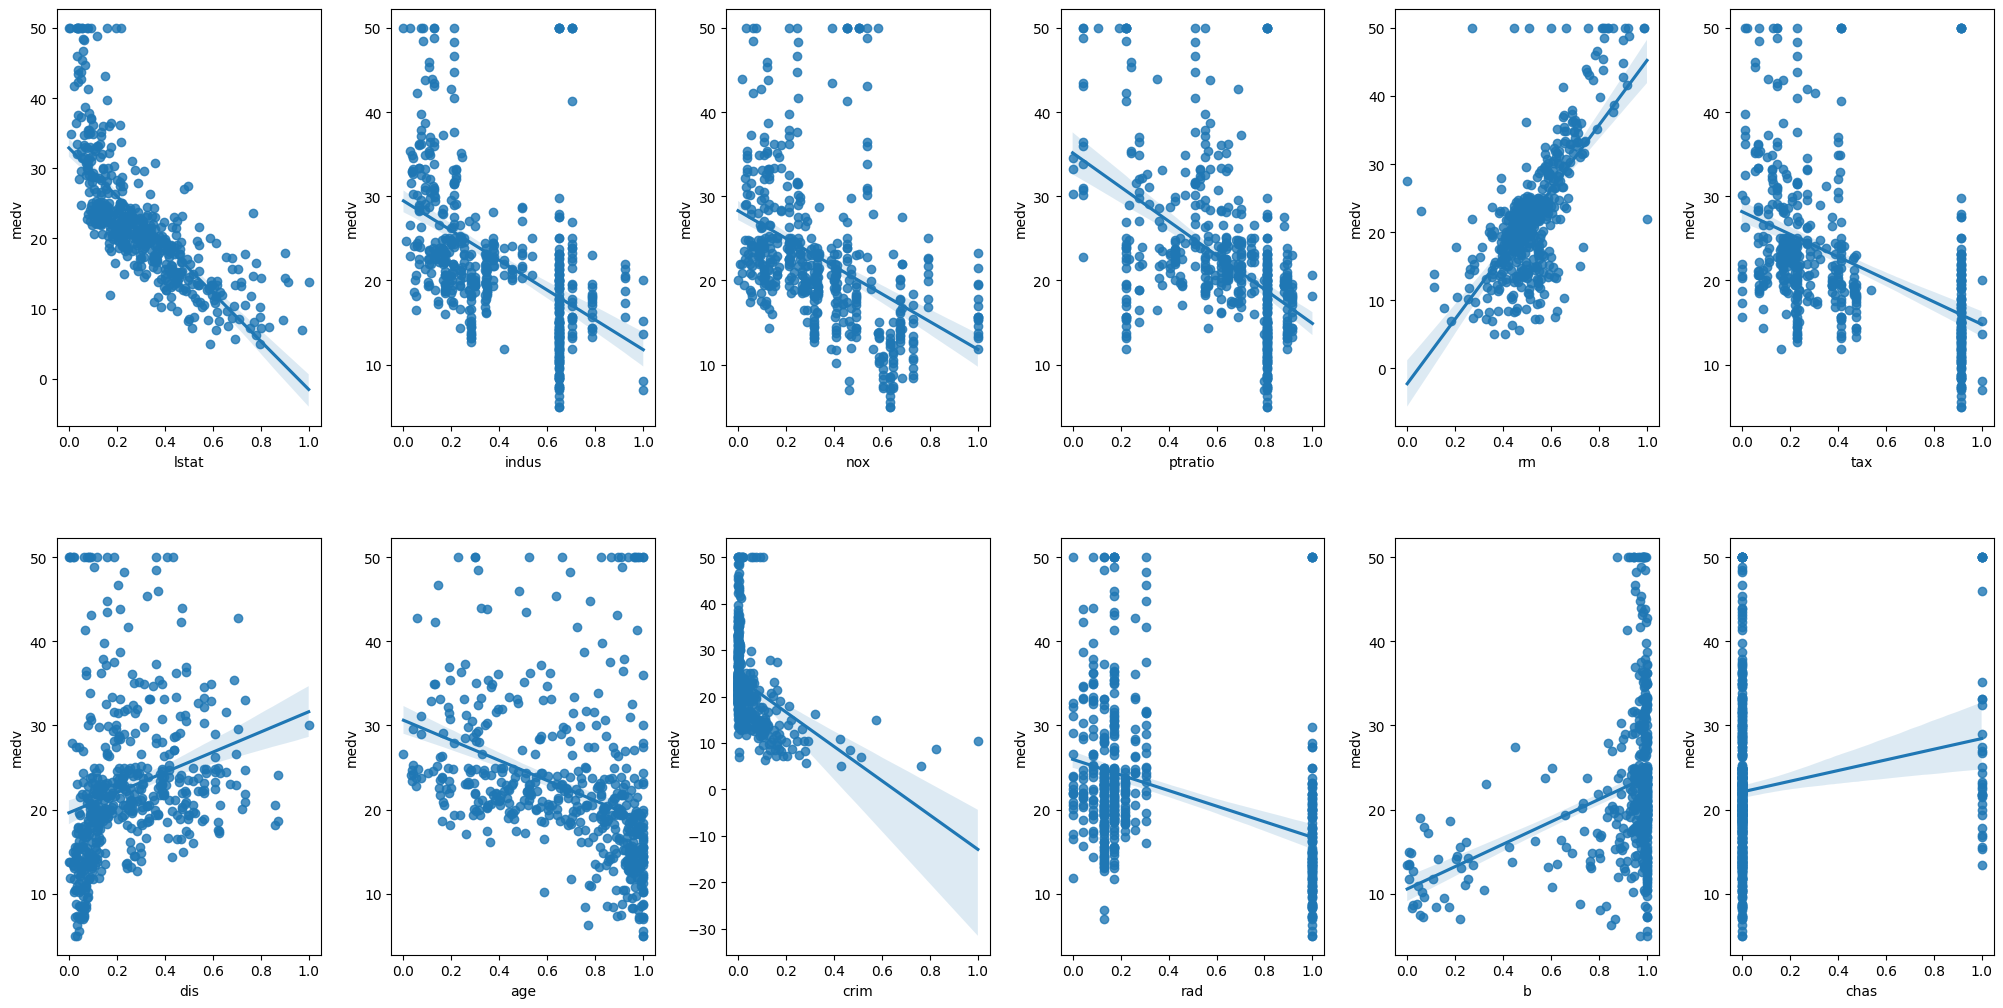

In [ ]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['lstat', 'indus', 'nox', 'ptratio', 'rm', 'tax', 'dis', 'age', 'crim', 'rad', 'b', 'chas']

x = df.loc[:,column_sels]
y = df['medv']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


#### 2.2 Multicollinearity

It can be checked by calculating the variance inflation factor (VIF) for each independent variable. A VIF of 10 or greater indicates that the independent variable is highly correlated with other independent variables.

<Axes: >

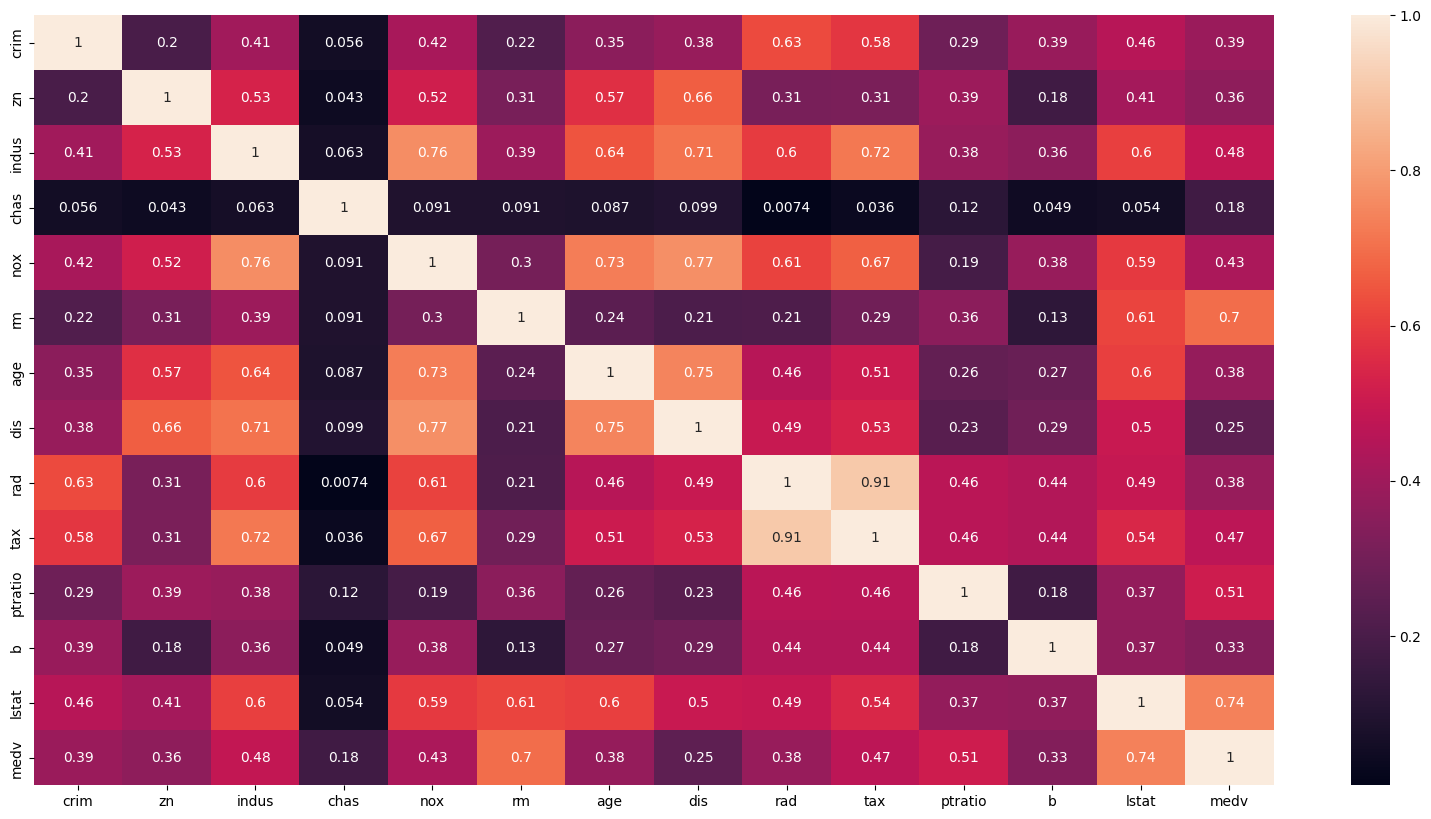

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr().abs(),  annot=True)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
X = df.drop(columns=["medv"])
y = df["medv"]
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Check for high VIF values
high_vif_features = vif_data[vif_data["VIF"] > 15]
high_vif_features

,feature,VIF
4,nox,73.894947
5,rm,77.948283
6,age,21.386850
8,rad,15.167725
9,tax,61.227274
10,ptratio,85.029547
11,b,20.104943


In [ ]:
vif_list = high_vif_features.feature.to_list()
df_v1 = df[df.columns[~df.columns.isin(vif_list)]]
df_v1

,crim,zn,indus,chas,dis,lstat,medv
0,0.00632,18.0,2.31,0,4.0900,4.98,24.0
1,0.02731,0.0,7.07,0,4.9671,9.14,21.6
2,0.02729,0.0,7.07,0,4.9671,4.03,34.7
3,0.03237,0.0,2.18,0,6.0622,2.94,33.4
4,0.06905,0.0,2.18,0,6.0622,5.33,36.2
...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,2.4786,9.67,22.4
502,0.04527,0.0,11.93,0,2.2875,9.08,20.6
503,0.06076,0.0,11.93,0,2.1675,5.64,23.9
504,0.10959,0.0,11.93,0,2.3889,6.48,22.0


#### 2.3 Average Prices of Goods Using OLS

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Multiple Regression to Estimate Prices
X = df_v1.drop(columns=["medv"])
y = df_v1["medv"]
# model = LinearRegression()
# model.fit(X, y)
# estimated_prices_v2 = model.coef_
# Convert the X DataFrame to a format compatible with statsmodels
X_with_intercept = sm.add_constant(X)

# Fit the ordinary least squares model using statsmodels
ols_model = sm.OLS(y, X_with_intercept).fit()

# Access the coefficients
estimated_prices = ols_model.params[1:]
# Print the summary of the regression
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.635
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     144.7
Date:                Wed, 13 Sep 2023   Prob (F-statistic):          8.18e-106
Time:                        13:53:16   Log-Likelihood:                -1585.3
No. Observations:                 506   AIC:                             3185.
Df Residuals:                     499   BIC:                             3214.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.6111      1.219     34.954      0.0

## 3. Relative Prices and Marginal Rates of Substitution (MRS)

 We can use regression analysis to estimate the prices of different goods and services. From these estimated prices, we can calculate the relative prices of the goods and services. The relative prices are equal to the marginal rates of substitution (MRS), which is the amount of one good that a person is willing to give up to get one more unit of another good.

In [ ]:
estimated_prices

crim    -0.108449
zn       0.090360
indus   -0.296351
chas     4.210404
dis     -1.815344
lstat   -0.854713
dtype: float64

> In microeconomics, relative prices tell you how much one thing costs compared to another. Negative prices usually don't make much sense in this setting because prices are normally positive.

In [ ]:
estimated_prices_mrs = estimated_prices.abs()
estimated_prices_mrs

crim     0.108449
zn       0.090360
indus    0.296351
chas     4.210404
dis      1.815344
lstat    0.854713
dtype: float64

> The multiple linear regression equation (let's consider it as a utility function for this context) has the following form:
```
MEDV = 42.6111 - 0.1084 * CRIM + 0.0904 * ZN - 0.2964 * INDUS + 4.2104 * CHAS - 1.8153 * DIS - 0.8547 * LSTAT
```

# Exercise 2:

>  Based on Section 4.6, 'Utility for Commuting,' on page 68 of the Intermediate Microeconomics book, calculate the Marginal Rate of Substitution (MRS) for CRIM and DIS?"


In a standard utility function $U(x, y)$, the Marginal Rate of Substitution (MRS) is calculated as the negative ratio of the marginal utilities of the two goods, i.e.,

$$
-\frac{dU/dy}{dU/dx}
$$

However, in a linear model like the one we're considering, the coefficients themselves essentially represent the marginal effects -- the change in the dependent variable (here, MEDV) for a one-unit change in the independent variable, all else being constant.

To calculate the Marginal Rate of Substitution (MRS) between DIS and CRIM, you would take the ratio of their respective coefficients. In this specific case, that would be:

$$
\text{MRS}_{\text{DIS,CRIM}} = \frac{-1.8153}{-0.1084} \approx 16.739
$$

In this context, a one-unit increase in DIS could be offset by approximately a 16.739 unit decrease in CRIM to maintain the same predicted MEDV.


> Customer should be willing to increase 1 unit of DIS to decrease 16 unit of CRIM.


In [ ]:
goodsdf = pd.DataFrame()
for god in range(len(estimated_prices_mrs)):
  # Compute Relative Prices (MRS)
  relative_prices = estimated_prices_mrs / estimated_prices_mrs[god]  # We assumend Relative Price is equal to MRS
  goodsdf[god] = relative_prices
  print("Relative Prices (MRS):")
  for i, r_price in enumerate(relative_prices):
      print(f"Relative Price of {relative_prices.index[i]} compared to {estimated_prices_mrs.index[god]}: {r_price}")
  print('=====================================')

Relative Prices (MRS):
Relative Price of crim compared to crim: 1.0
Relative Price of zn compared to crim: 0.833203779956503
Relative Price of indus compared to crim: 2.732626976726115
Relative Price of chas compared to crim: 38.82378361993744
Relative Price of dis compared to crim: 16.739134111690092
Relative Price of lstat compared to crim: 7.881239025933285
Relative Prices (MRS):
Relative Price of crim compared to zn: 1.2001865858700311
Relative Price of zn compared to zn: 1.0
Relative Price of indus compared to zn: 3.279662241653261
Relative Price of chas compared to zn: 46.595784313369556
Relative Price of dis compared to zn: 20.090084219929906
Relative Price of lstat compared to zn: 9.45895735896052
Relative Prices (MRS):
Relative Price of crim compared to indus: 0.36594822803003735
Relative Price of zn compared to indus: 0.3049094468630114
Relative Price of indus compared to indus: 1.0
Relative Price of chas compared to indus: 14.207494821137697
Relative Price of dis compared to

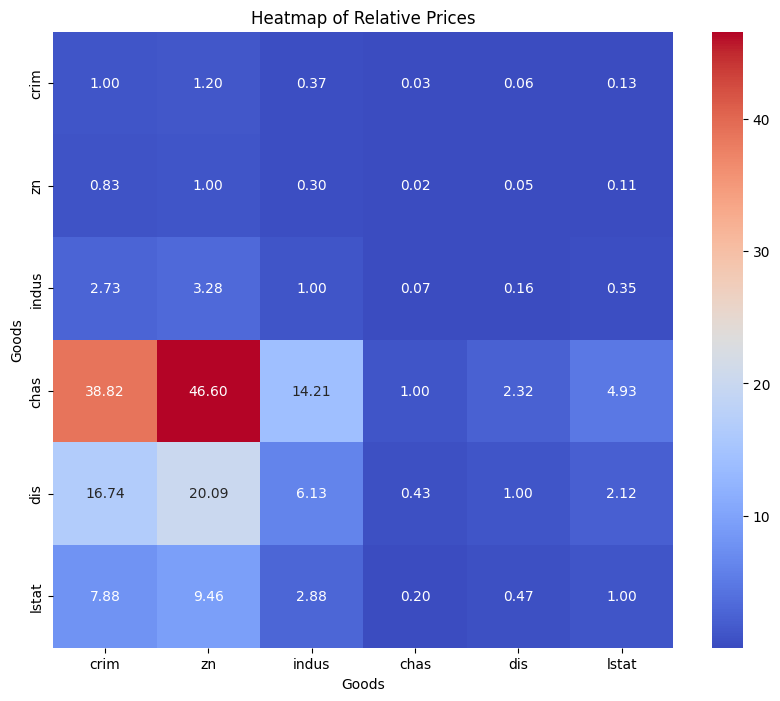

In [ ]:
# Create a heatmap using seaborn

goodsdf.columns = goodsdf.index
plt.figure(figsize=(10, 8))
sns.heatmap(goodsdf, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap of Relative Prices')
plt.xlabel('Goods')
plt.ylabel('Goods')

plt.show()

Let's break down the interpretations for **CRIM**:

> #### Relative Price of zn compared to crim: 0.8332
A one-unit increase in CRIM could be offset by approximately a 0.8332 unit increase in ZN to maintain the same predicted MEDV.

> #### Relative Price of indus compared to crim: 2.7326
A one-unit increase in CRIM could be offset by approximately a 2.7326 unit increase in INDUS to maintain the same predicted MEDV.

> #### Relative Price of chas compared to crim: 38.8238
A one-unit increase in CRIM could be offset by approximately a 38.824 unit increase in CHAS to maintain the same predicted MEDV. Note that this is hard to interpret directly since CHAS is a dummy variable.

> #### Relative Price of dis compared to crim: 16.7391
A one-unit increase in CRIM could be offset by approximately a 16.739 unit increase in DIS to maintain the same predicted MEDV.

> #### Relative Price of lstat compared to crim: 7.8812
A one-unit increase in CRIM could be offset by approximately a 7.881 unit increase in LSTAT to maintain the same predicted MEDV.


# Exercise 3:

>  Based on the provided information about the relative value of each good compared to other, interpret the economic significance of these factors. Which goods are considered more or less valuable, and by what magnitude? Discuss any patterns or anomalies you observe, and consider what these might imply in an economic context.

## 4. Clustering Data to Identify Structural Breaks

Clustering is a technique that groups similar data points together. By clustering the data, it is possible to identify groups of data points that are affected by different structural breaks.

A structural break is a sudden and permanent change in the statistical properties of a data set. This change can be caused by a number of factors, such as a change in government policy, a natural disaster, or a technological innovation.

Clustering can be used to identify structural breaks in data by grouping data points that are affected by the same break together. This can be done by using a variety of clustering algorithms, such as k-means clustering or hierarchical clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

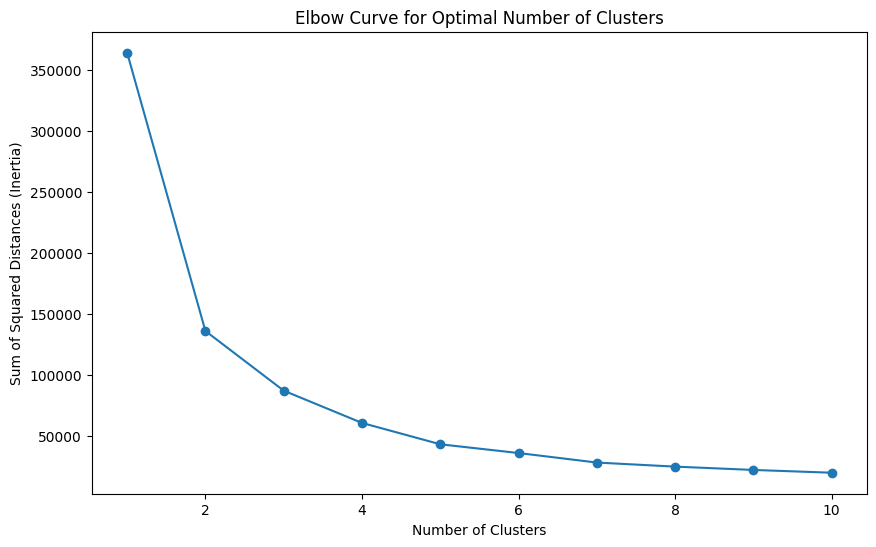

In [ ]:
# Using ML for Structural Breaks Detection with Elbow Method
# Let's try different numbers of clusters and calculate the sum of squared distances (to detect the elbow of the curve)
inertia_values = []
possible_cluster_counts = range(1, 11)  # Trying 1 to 10 clusters

for cluster_count in possible_cluster_counts:
    kmeans = KMeans(n_clusters=cluster_count)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(possible_cluster_counts, inertia_values, marker='o')
plt.title("Elbow Curve for Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Squared Distances (Inertia)")
plt.show()

In this plot, the elbow point is the point where the curve bends sharply. **The elbow** is clearly visible at **k = 2**. This means that the optimal number of clusters for this data set is 2.



In [ ]:
# Clustering Data using KMeans to detect Structural Breaks
clustering_model = KMeans(n_clusters=2)  # We can adjust the number of clusters
df_v1['Cluster'] = clustering_model.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-27-640e6f2335e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v1['Cluster'] = clustering_model.fit_predict(X)


In [ ]:
df_v1['Cluster'].value_counts()

0    447
1     59
Name: Cluster, dtype: int64

In [ ]:
# Cluster 0
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Multiple Regression to Estimate Prices
X_0 = df_v1[df_v1['Cluster'] == 0].drop(columns=["medv", 'Cluster'])
y_0 = df_v1[df_v1['Cluster'] == 0]["medv"]

# Convert the X DataFrame to a format compatible with statsmodels
X_with_intercept_0 = sm.add_constant(X_0)

# Fit the ordinary least squares model using statsmodels
ols_model_0 = sm.OLS(y_0, X_with_intercept_0).fit()

# Access the coefficients
estimated_prices_0 = ols_model_0.params[1:]
# Print the summary of the regression
print(ols_model_0.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.605
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     112.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.66e-85
Time:                        13:53:17   Log-Likelihood:                -1403.5
No. Observations:                 447   AIC:                             2821.
Df Residuals:                     440   BIC:                             2850.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6648      1.334     31.226      0.0

In [ ]:
estimated_prices_0_mrs = estimated_prices_0.abs()
estimated_prices_0_mrs

crim     0.108187
zn       0.131013
indus    0.269942
chas     4.303296
dis      1.704983
lstat    0.842301
dtype: float64

In [ ]:
goodsdf_0 = pd.DataFrame()
for god in range(len(estimated_prices_0_mrs)):
  # Compute Relative Prices (MRS)
  relative_prices_0 = estimated_prices_0_mrs / estimated_prices_0_mrs[god]  # We assumend Relative Price is equal to MRS
  goodsdf_0[god] = relative_prices_0
  print("Relative Prices (MRS):")
  for i, r_price in enumerate(relative_prices_0):
      print(f"Relative Price of {relative_prices_0.index[i]} compared to {estimated_prices_0_mrs.index[god]}: {r_price}")
  print('=====================================')

Relative Prices (MRS):
Relative Price of crim compared to crim: 1.0
Relative Price of zn compared to crim: 1.2109874023120106
Relative Price of indus compared to crim: 2.495137641022616
Relative Price of chas compared to crim: 39.776417121212994
Relative Price of dis compared to crim: 15.759576516690194
Relative Price of lstat compared to crim: 7.785597717613433
Relative Prices (MRS):
Relative Price of crim compared to zn: 0.8257724218194222
Relative Price of zn compared to zn: 1.0
Relative Price of indus compared to zn: 2.060415852600046
Relative Price of chas compared to zn: 32.84626829748358
Relative Price of dis compared to zn: 13.013823667035755
Relative Price of lstat compared to zn: 6.429131882585411
Relative Prices (MRS):
Relative Price of crim compared to indus: 0.4007794935072826
Relative Price of zn compared to indus: 0.4853389177423075
Relative Price of indus compared to indus: 1.0
Relative Price of chas compared to indus: 15.941572307374146
Relative Price of dis compared t

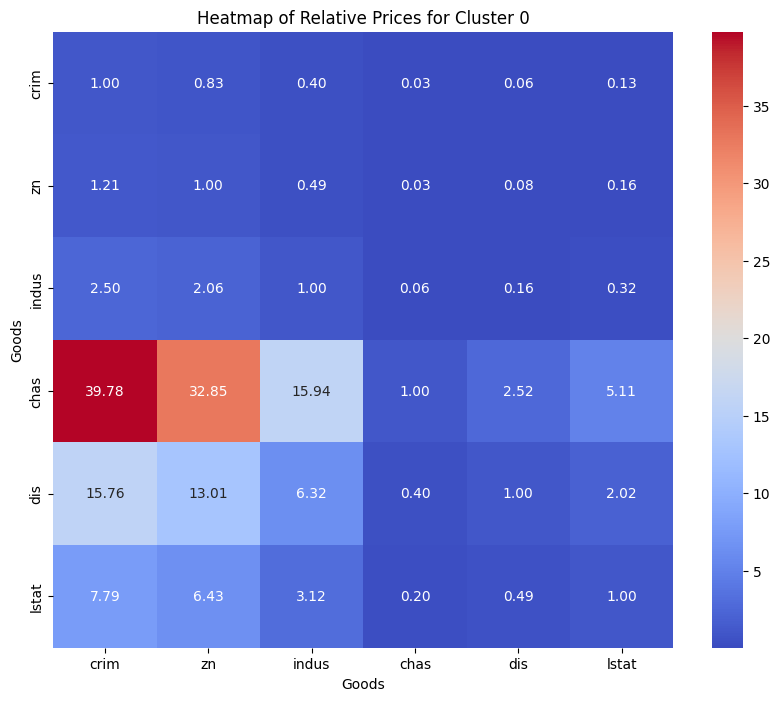

In [ ]:
# Create a heatmap using seaborn for Cluster 0

goodsdf_0.columns = goodsdf_0.index
plt.figure(figsize=(10, 8))
sns.heatmap(goodsdf_0, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap of Relative Prices for Cluster 0')
plt.xlabel('Goods')
plt.ylabel('Goods')

plt.show()

Let's break down the interpretations for **CRIM** for **Cluster 0**:

> #### Relative Price of zn compared to crim: 1.2110
A one-unit increase in CRIM could be offset by approximately a 1.2110 unit increase in ZN to maintain the same predicted MEDV.

> #### Relative Price of indus compared to crim: 2.4951
A one-unit increase in CRIM could be offset by approximately a 2.4951 unit increase in INDUS to maintain the same predicted MEDV.

> #### Relative Price of chas compared to crim: 39.7764
A one-unit increase in CRIM could be offset by approximately a 39.776 unit increase in CHAS to maintain the same predicted MEDV. Note that this is difficult to interpret directly since CHAS is a dummy variable.

> #### Relative Price of dis compared to crim: 15.7596
A one-unit increase in CRIM could be offset by approximately a 15.760 unit increase in DIS to maintain the same predicted MEDV.

> #### Relative Price of lstat compared to crim: 7.7856
A one-unit increase in CRIM could be offset by approximately a 7.786 unit increase in LSTAT to maintain the same predicted MEDV.


# Exercise 4:

>  Based on the provided information about the relative value of each good compared to others in cluster 0, interpret the economic significance of these factors. Which goods are considered more or less valuable, and to what extent for this cluster? Discuss any patterns or anomalies you observe, and consider what these might imply in an economic context.



In [ ]:
df_v1[df_v1['Cluster'] == 0].describe().T

,count,mean,std,min,25%,50%,75%,max
crim,447.0,4.084707,9.047962,0.00632,0.11446,0.37578,4.65786,88.9762
zn,447.0,3.808725,8.857162,0.00000,0.00000,0.00000,0.00000,35.0000
indus,447.0,12.205034,6.569194,1.38000,6.20000,10.59000,18.10000,27.7400
chas,447.0,0.069351,0.254335,0.00000,0.00000,0.00000,0.00000,1.0000
dis,447.0,3.370415,1.735261,1.12960,2.00010,2.82370,4.36070,9.2229
lstat,447.0,13.568591,7.055595,1.73000,8.10000,12.50000,17.59000,37.9700
medv,447.0,21.550336,8.902038,5.00000,16.10000,20.40000,24.05000,50.0000
Cluster,447.0,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.0000


In [ ]:
df_v1[df_v1['Cluster'] == 1].describe().T

,count,mean,std,min,25%,50%,75%,max
crim,59.0,0.043706,0.028537,0.00906,0.01987,0.03584,0.06169,0.12579
zn,59.0,68.601695,18.978613,35.00000,52.50000,75.00000,80.00000,100.00000
indus,59.0,3.043390,1.586294,0.46000,1.72500,2.93000,3.76500,6.41000
chas,59.0,0.067797,0.253555,0.00000,0.00000,0.00000,0.00000,1.00000
dis,59.0,7.012134,1.879949,3.78860,5.52475,7.03790,8.07630,12.12650
lstat,59.0,5.716780,2.408880,1.98000,4.24000,5.10000,6.91000,14.80000
medv,59.0,29.976271,7.956874,18.20000,23.70000,30.10000,33.25000,50.00000
Cluster,59.0,1.000000,0.000000,1.00000,1.00000,1.00000,1.00000,1.00000


In [ ]:
# Cluster 1
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Multiple Regression to Estimate Prices
X_1 = df_v1[df_v1['Cluster'] == 1].drop(columns=["medv", 'Cluster'])
y_1 = df_v1[df_v1['Cluster'] == 1]["medv"]

# Convert the X DataFrame to a format compatible with statsmodels
X_with_intercept_1 = sm.add_constant(X_1)

# Fit the ordinary least squares model using statsmodels
ols_model_1 = sm.OLS(y_1, X_with_intercept_1).fit()

# Access the coefficients
estimated_prices_1 = ols_model_1.params[1:]
# Print the summary of the regression
print(ols_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     19.04
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.39e-11
Time:                        13:53:18   Log-Likelihood:                -171.29
No. Observations:                  59   AIC:                             356.6
Df Residuals:                      52   BIC:                             371.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.2712      5.234     10.369      0.0

**The P-value of CRIM** is graeter than 0.5, then we cannot reject the null hypothesis that the coefficient of this variable is equal to zero. **This means that the variable is not statistically significant.**

In [ ]:
estimated_prices_1_mrs = estimated_prices_1[1:].abs()
estimated_prices_1_mrs

zn       0.085757
indus    1.623290
chas     5.375213
dis      2.371767
lstat    1.450680
dtype: float64

In [ ]:
goodsdf_1 = pd.DataFrame()
for god in range(len(estimated_prices_1_mrs)):
  # Compute Relative Prices (MRS)
  relative_prices_1 = estimated_prices_1_mrs / estimated_prices_1_mrs[god]  # We assumend Relative Price is equal to MRS
  goodsdf_1[god] = relative_prices_1
  print("Relative Prices (MRS):")
  for i, r_price in enumerate(relative_prices_1):
      print(f"Relative Price of {relative_prices_1.index[i]} compared to {estimated_prices_1_mrs.index[god]}: {r_price}")
  print('=====================================')

Relative Prices (MRS):
Relative Price of zn compared to zn: 1.0
Relative Price of indus compared to zn: 18.928911233895604
Relative Price of chas compared to zn: 62.67944879709079
Relative Price of dis compared to zn: 27.656775302637296
Relative Price of lstat compared to zn: 16.91613053720433
Relative Prices (MRS):
Relative Price of zn compared to indus: 0.05282924028981239
Relative Price of indus compared to indus: 1.0
Relative Price of chas compared to indus: 3.3113076617345016
Relative Price of dis compared to indus: 1.4610864281043745
Relative Price of lstat compared to indus: 0.8936663249238007
Relative Prices (MRS):
Relative Price of zn compared to chas: 0.015954192629186202
Relative Price of indus compared to chas: 0.3019954960863372
Relative Price of chas compared to chas: 1.0
Relative Price of dis compared to chas: 0.441241520680395
Relative Price of lstat compared to chas: 0.269883205131017
Relative Prices (MRS):
Relative Price of zn compared to dis: 0.036157505314968585
Rel

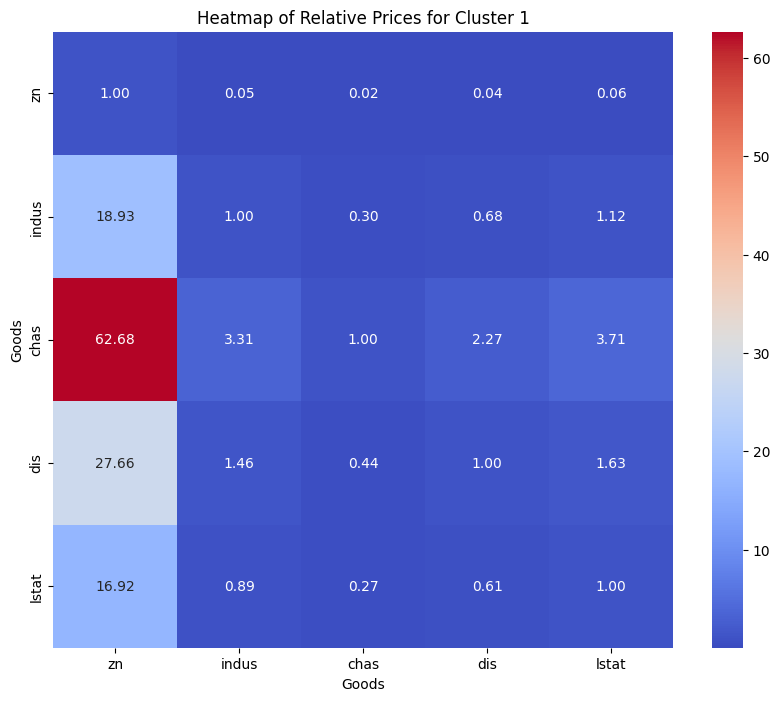

In [ ]:
# Create a heatmap using seaborn for Cluster 0

goodsdf_1.columns = goodsdf_1.index
plt.figure(figsize=(10, 8))
sns.heatmap(goodsdf_1, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap of Relative Prices for Cluster 1')
plt.xlabel('Goods')
plt.ylabel('Goods')

plt.show()

Let's break down the interpretations for **zn** for **Cluster 1**:

> #### Relative Price of indus compared to zn: 18.929
A one-unit increase in ZN could be offset by approximately a 18.929 unit increase in INDUS to maintain the same predicted MEDV.

> #### Relative Price of chas compared to zn: 62.679
A one-unit increase in ZN could be offset by approximately a 62.679 unit increase in CHAS to maintain the same predicted MEDV. Note that this is hard to interpret directly since CHAS is a dummy variable.

> #### Relative Price of dis compared to zn: 27.657
A one-unit increase in ZN could be offset by approximately a 27.657 unit increase in DIS to maintain the same predicted MEDV.

> #### Relative Price of lstat compared to zn: 16.916
A one-unit increase in ZN could be offset by approximately a 16.916 unit increase in LSTAT to maintain the same predicted MEDV.



# Exercise 5:

>  Based on the provided information about the relative value of each good compared to others in cluster 1, interpret the economic significance of these factors. Which goods are considered more or less valuable, and to what extent for this cluster? Discuss any patterns or anomalies you observe, and consider what these might imply in an economic context.

## 5. Comparing the results


<img src="https://raw.githubusercontent.com/HamidBekamiri/Microeconomics/main/Comparing_results_1.png" alt="Image" width="800" height="250"/>


In [ ]:
df_v1['Cluster'].value_counts()

0    447
1     59
Name: Cluster, dtype: int64

In [ ]:
df_v1[df_v1['Cluster'] == 0]['medv'].mean()

21.550335570469798

In [ ]:
df_v1[df_v1['Cluster'] == 1]['medv'].mean()

29.976271186440673

# Exercise 6:

Reproduce the results of the hands-on project for the following dataset.


In [ ]:
import pandas as pd

df_2 = pd.read_csv('https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv')

In [ ]:
df_2.shape

(20640, 10)

In [ ]:
df_2.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
